In [1]:
from utils.config import *
import utils.df_processor as dfp
import utils.word_segment as ws
from IPython.display import display
import pandas as pd
import os

### Load Dataframe 

Load original csv file

In [ ]:
df_i = pd.read_csv(I_DATA_PATH, encoding=ENCODING)
df_s = pd.read_csv(S_DATA_PATH, encoding=ENCODING)


Add additional column for category

In [ ]:
df_i.insert(0, 'category', '內科')
df_s.insert(0, 'category', '外科')

Concate two dataframe

In [ ]:
df = pd.concat([df_i, df_s], ignore_index=True)


Add additional column for compose category and department

In [ ]:
df.insert(0, 'cat_dep', df['category']+df['department'])
print(df.head())

In [3]:
dep_lst= ['內科内分泌科', '內科呼吸科', '內科心血管科', '內科感染科', '內科普通内科', '內科消化科', '內科神经科', '內科肝病科'
, '內科肾内科', '內科血液科', '內科风湿免疫科', '外科乳腺科', '外科心外科', '外科普通外科', '外科泌尿科', '外科神经脑外科'
, '外科肛肠', '外科肝胆科', '外科胸外科', '外科血管科']

df.insert(1, 'dep_id', df['cat_dep'].apply(lambda x: dep_lst.index(x) if x in dep_lst else 99))

if column of ask is null, copy the context from title

In [26]:
df.loc[df['ask']== '无', 'ask']= df[df['ask']== '无']['title']
display(df.head())

In [27]:
display(df.where(df['ask']== '无'))

,cat_dep,dep_id,category,department,title,ask,answer,answer_clean,ask_clean,title_clean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
336590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print((df['ask']== '无').sum())

40381


### Remove Stop Words and Word Segment 


Create cloumns to store result of word segmentation and removing stopwords 

speding time:
- title: 6m 30.2s
- ask: 9m 8.3s
- ans: 14m 32.4s

In [ ]:
df['answer_clean'] = df['answer'].apply(lambda x: ws.word_segment(x, STOP_WORDS_PATH))
df['ask_clean'] = df['ask'].apply(lambda x: ws.word_segment(x, STOP_WORDS_PATH))
df['title_clean'] = df['title'].apply(lambda x: ws.word_segment(x, STOP_WORDS_PATH))

Save csv after word segment

In [5]:
df.to_csv(os.path.join(SAVING_DIR, 'df.csv'), index=False)

### Load CSV After WS

In [3]:
df = pd.read_csv(ALL_DATA_PATH, encoding=ENCODING)

In [ ]:
display(df_i['department'].value_counts())
display(df_s['department'].value_counts())

In [6]:
df= dfp.df_filt(df, DEP_MIN_AMOUNT)
display(dfp.get_dep_counts(df))
print(len(dfp.get_dep_counts(df)))

內科神经科      46844
內科消化科      32245
內科呼吸科      27931
外科肛肠       24016
外科神经脑外科    23620
內科心血管科     22841
內科内分泌科     21745
外科普通外科     21179
內科肝病科      20888
外科泌尿科      18422
內科肾内科      14010
內科普通内科     13447
內科血液科       9968
外科肝胆科       8831
外科乳腺科       8823
外科血管科       6404
內科风湿免疫科     5486
內科感染科       4035
外科胸外科       2913
外科心外科       1777
Name: cat_dep, dtype: int64

20


Add additional column for class

In [3]:
display(df.head())

,cat_dep,dep_id,category,department,title,ask,answer,answer_clean,ask_clean,title_clean
0,內科心血管科,2,內科,心血管科,高血压患者能吃党参吗？,我有高血压这两天女婿来的时候给我拿了些党参泡水喝，您好高血压可以吃党参吗？,高血压病人可以口服党参的。党参有降血脂，降血压的作用，可以彻底消除血液中的垃圾，从而对冠心病...,"['高血压', '病人', '口服', '党参', '党参', '降血脂', '降血压', ...","['高血压', '两天', '女婿', '些', '党参', '泡水', '喝', '您好'...","['高血压', '患者', '吃', '党参']"
1,內科心血管科,2,內科,心血管科,高血压该治疗什么？,我是一位中学教师，平时身体健康，最近学校组织健康检查，结果发觉我是高血压，去年还没有这种情况...,高血压患者首先要注意控制食盐摄入量，每天不超过六克，注意不要吃太油腻的食物，多吃新鲜的绿色蔬...,"['高血压', '患者', '控制', '食盐', '摄入量', '不', '超过', '六...","['一位', '中学教师', '平时', '身体健康', '学校', '组织', '健康检查...","['高血压', '治疗']"
2,內科心血管科,2,內科,心血管科,老年人高血压一般如何治疗？,我爷爷今年68了，年纪大了，高血压这些也领着来了，这些病让老人很痛苦，每次都要按时喝药，才能...,你爷爷患高血压，这是老年人常见的心血管病，血管老化硬化，血压调整能力消退了，目前治疗高血压最...,"['爷爷', '患', '高血压', '这是', '老年人', '常见', '心血管病', ...","['爷爷', '68', '年纪', '大', '高血压', '领着', '病', '老人'...","['老年人', '高血压', '治疗']"
3,內科内分泌科,0,內科,内分泌科,糖尿病还会进行遗传吗？,糖尿病有隔代遗传吗？我妈是糖尿病，很多年了，也没养好，我现在也是，我妹子也是，我儿子现在二十...,2型糖尿病的隔代遗传概率为父母患糖尿病，临产的发生率为40%，比一般人患糖尿病，疾病，如何更...,"['型', '糖尿病', '隔代遗传', '概率', '父母', '患', '糖尿病', '...","['糖尿病', '隔代遗传', '我妈', '糖尿病', '很多年', '没养', '好',...","['糖尿病', '还会', '遗传']"
4,內科内分泌科,0,內科,内分泌科,糖尿病一般需要怎么治疗？,我妈定期检查仔细检查的时候，仔细检查出患糖尿病，糖尿病需要有怎么治疗？我大概知晓是需要有控制...,糖尿病患者首先通过饮食控制和锻练运动，肥胖患者把体重降下来等方式调整一下看一看，如果血糖仍然...,"['糖尿病', '患者', '饮食', '控制', '锻练', '运动', '肥胖', '患...","['我妈', '定期检查', '仔细检查', '仔细检查', '出患', '糖尿病', '糖...","['糖尿病', '治疗']"


In [ ]:
df = pd.read_csv(ALL_DATA_PATH, encoding=ENCODING)


In [ ]:
df.insert(6, 'title_clean', df['title'].apply(lambda x: ws.word_segment(x)))
df.to_csv(os.path.join(SAVING_DIR, 'df_3.csv'), index=False)

In [ ]:
display(df.head())

### Training

Split for train_set and test_set

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df['ask_clean'], df['dep_id'], test_size=0.2, shuffle=True)

Trun String to list

In [9]:
from ast import literal_eval
x_train= [literal_eval(lst) for lst in x_train]
x_test= [literal_eval(lst) for lst in x_test]

In [6]:
idx= 0
display(x_train[idx], y_train[idx])

['患者',
 '性别',
 '女患者',
 '年龄',
 '60',
 '肝硬化',
 '脾脏',
 '切除',
 '手术',
 '一个多月',
 '后',
 '发烧',
 '现象',
 '何原因',
 '服用',
 '药']

2

Pipeline model

In [3]:
from utils.sklearn_api.gensim_word2vec import GensimWord2VecVectorizer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
xgb_model= Pipeline([
    ('w2v', GensimWord2VecVectorizer(size=VECTOR_SIZE,
        min_count=MIN_COUNT, 
        workers=WORKERS, 
        window=WINDOW)),
    ('xgb', XGBClassifier(
        learning_rate=LEARNING_RATE, 
        objective=OBJECTIVE, 
        eval_metric=EVAL_METRIC, 
        scale_pos_weight=SCALE_POS_WEIGHT, 
        colsample_btree=COLSAMPLE_BTREE,
        subsample=SUBSAMPLE))
])

D:\ProgramFiles\Anoconda\envs\nursing-env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Train and test

In [ ]:
from sklearn.metrics import accuracy_score
xgb_model.fit(x_train, y_train)

y_test_pred = xgb_model.predict(x_test)
test_score = accuracy_score(y_test, y_test_pred)


### model evaluate
accuracy = accuracy_score(y_test,y_test_pred)
print("accuarcy: %.5f%%" % (accuracy*100.0))

Save pipeline model

In [5]:
import joblib
import os
joblib.dump(xgb_model, os.path.join(SAVING_DIR, 'xgb_model.joblib'))

['D:\\CodeRepositories\\py_project\\data_mining\\DataMiningMid_Classification\\data\\xgb_model.joblib']

### Plot curve

In [17]:
import joblib
import os
import matplotlib.pyplot  as plt
model_path = 'D:\\CodeRepositories\\py_project\\data_mining\\DataMiningMid_Classification\\runs\\xgb_model_IS.joblib'
xgb_pipeline = joblib.load(model_path)

w2v_layer = xgb_pipeline.named_steps["w2v"]
xgb_layer = xgb_pipeline.named_steps["xgb"]

In [20]:
x= '你好，之前打球脚扭伤了，想问问什么时候可以继续打球'

xgb_pipeline.predict(ws.word_segment(x, STOP_WORDS_PATH))

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
yhat = xgb_pipeline.predict(x_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.5f' % score)

<AxesSubplot:title={'center':'gain'}, xlabel='F score', ylabel='Features'>

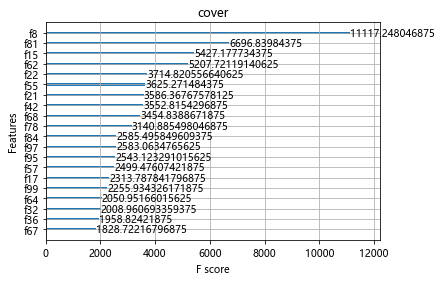

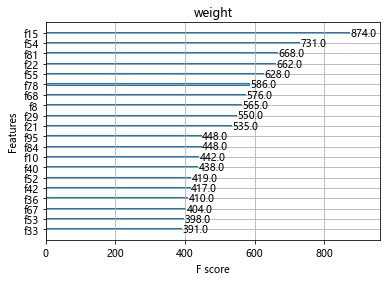

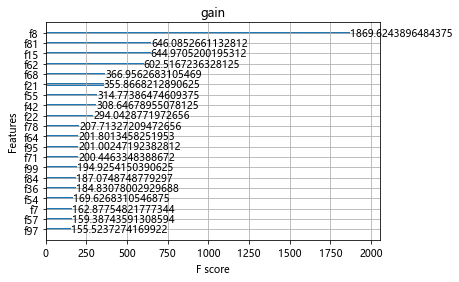

In [20]:
import xgboost
xgboost.plot_importance(xgb_layer, title='cover', max_num_features=20, importance_type='cover')
xgboost.plot_importance(xgb_layer, title='weight', max_num_features=20, importance_type='weight')
xgboost.plot_importance(xgb_layer, title='gain', max_num_features=20, importance_type='gain')

In [22]:
def display_w2v(model, x, y):
    # graph= plt.figure()
    plt.figure(figsize=(10, 10))
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    for _, key in enumerate(model.model_.wv.key_to_index):
        vec=model.model_.wv.get_vector(key)
        # if vec[x]> 0.8 or vec[y]> 0.8 or vec[x]< -0.8 or vec[y]< -0.8:
        # if vec[35]< 0.69 and vec[94]>1.22 and vec[54]>-0.83 and vec[21]<-0.12 and vec[10]<-0.05 and vec[79]<0.29 and vec[87]<-0.65 and vec[1]>-0.25:
        plt.annotate(u'%s' % key, xy=(vec[x], vec[y]), xytext=(0, 0), textcoords='offset points')
        
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show

In [ ]:
import matplotlib.font_manager
fpaths = matplotlib.font_manager.findSystemFonts()

for i in fpaths:
    f = matplotlib.font_manager.get_font(i)
    print(f.family_name)

D:\ProgramFiles\Anoconda\envs\nursing-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


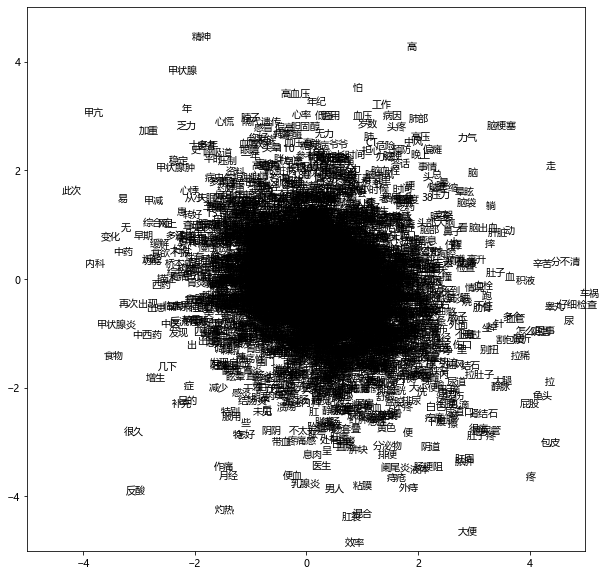

In [23]:
display_w2v(w2v_layer, 8, 15)


In [6]:
import xgboost
# xgboost.plot_importance(xgb_layer, height=0.5)
xgboost.to_graphviz(xgb_layer).render(filename='xgb_graph.png')

'xgb_graph.png.pdf'

In [11]:
results = xgb_layer.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

XGBoostError: No evaluation result, `eval_set` is not used during training.